##### Libraries

In [ ]:
!pip install requests -q
!pip install html5lib -q
!pip install bs4 -q
!pip install selenium -q
!pip install webdriver_manager -q
!pip install beautifulsoup4 -q
!pip install -q openai
!pip install rouge_score -q
!pip install transformers -q
!pip install evaluate -q

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.2/400.2 kB 28.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.0/77.0 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 32.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 58.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 59.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
#!pip install langchain -q
!pip install wikipedia -q

  Preparing metadata (setup.py) ... done


In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import os
import openai
import time
import matplotlib.pyplot as plt
import evaluate
from transformers import pipeline
import torch
import re

In [ ]:
openai_api_key = "YOUR_API_KEY"

##### Data Scraping

###### Use BeautifulSoup 4 to scrape the content of a Wikipedia page. Retrieve not just the text but also the headings and sub-headings.

In [ ]:
'''
import requests
from bs4 import BeautifulSoup

# URL of the Wikipedia page you want to scrape
url = "https://en.wikipedia.org/wiki/Alexander_the_Great"
# Send an HTTP GET request to the URL
response = requests.get(url)
# Parse the HTML content of the page using BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')
# Get the title of the Wikipedia page
title = soup.title.string
print("Title:", title)

df = pd.DataFrame()
subsections_list = []
subheadings = []
par = []


subsection_heading_mains = []
sections_main = soup.find_all('span', {'class': 'mw-headline'})
for section_main in sections_main:
    # Extract subsection headings
    subsection_heading_main = section_main.text
    subsection_heading_mains.append(subsection_heading_main)


# Find all the top-level sections on the page
sections = soup.find_all(['h3'])
c = 0
for section in sections:
    # Extract the section heading
    section_heading = section.text.strip()
    #print("\nSection Heading:", section_heading)
    # Find the paragraphs under the section
    paragraphs = section.find_next_siblings('p')

    p = []
    for paragraph in paragraphs:
        paragraph_text = paragraph.text.strip()
        if paragraph_text:
            #print("\nParagraph:", paragraph_text)
            p.append(paragraph_text)
    subheadings.append(section_heading)
    par.append(" ".join(p))
    subsections_list.append(np.nan)


    # Find all the subsections under the section
    subsections = section.find_next_siblings(['h3'])

    for subsection in subsections:
        subsection_heading = subsection.text.strip()
        #print("\nSubsection Heading:", subsection_heading)

        # Find the paragraphs under the subsection
        subsection_paragraphs = subsection.find_next_siblings('p')

        p = []
        for paragraph in subsection_paragraphs:
            paragraph_text = paragraph.text.strip()
            if paragraph_text:
                #print("\nParagraph:", paragraph_text)
                p.append(paragraph_text)
        subheadings.append(subsection_heading)
        par.append(" ".join(p))
        subsections_list.append(np.nan)
df['subsections'] = subsections_list
df['subheadings'] = subheadings
df['paragraphs'] = par
'''

Title: Alexander the Great - Wikipedia


Below is the optimised version of above code

In [ ]:
def process_section(section, parent_heading=None):
    subsections_list = []
    subheadings = []
    paragraphs = []
    for subsection in section.find_all(['h3','h2']):
        subsection_heading = subsection.text.strip()
        subsection_paragraphs = subsection.find_next_siblings('p')
        paragraph_texts = []
        for paragraph in subsection_paragraphs:
            paragraph_text = paragraph.text.strip()
            if paragraph_text:
                paragraph_texts.append(paragraph_text)
            else:
                paragraph_texts.append("")  # Replace empty strings with empty string ""
        subheadings.append(subsection_heading)
        paragraphs.append(" ".join(paragraph_texts))
        subsections_list.append(parent_heading)
        # Recursively process nested subsections
        subsections = subsection.find_all(['h3','h2'])
        sub_subsections_list, sub_subheadings, sub_paragraphs = process_section(subsection, parent_heading=subsection_heading)
        subsections_list.extend(sub_subsections_list)
        subheadings.extend(sub_subheadings)
        paragraphs.extend(sub_paragraphs)
    return subsections_list, subheadings, paragraphs

# URL of the Wikipedia page you want to scrape
url = "https://en.wikipedia.org/wiki/Alexander_the_Great"
# Send an HTTP GET request to the URL and parse the HTML content
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')
# Initialize empty lists to store data
subsections_list, subheadings, paragraphs = process_section(soup)
# Create a DataFrame
data = {
    'section_headings': subsections_list,
    'subsection_headings': subheadings,
    'paragraphs': paragraphs
}
df = pd.DataFrame(data)
# Replace empty strings with "NaN"
df['paragraphs'].replace("", "NaN", inplace=True)

In [ ]:
subsection_heading_mains = []
sections = soup.find_all(['h2'])
for section in sections:
    # Extract the section heading
    section_heading = section.text.strip()
    subsection_heading_mains.append(section_heading)
    #print("\nSection Heading:", section_heading)
subsection_heading_mains

['Contents',
 'Early life',
 'Heir of Philip II',
 'King of Macedon',
 'Conquest of the Achaemenid Persian Empire',
 'Indian campaign',
 'Last years in Persia',
 'Death and succession',
 'Character',
 'Battle record',
 'Legacy',
 'Historiography',
 'See also',
 'References',
 'Further reading',
 'External links']

In [ ]:
print(subsection_heading_mains[6])

Last years in Persia


In [ ]:
name_to_find = 'Education'
index = df[df['subsection_headings'] == name_to_find].index[0]
print("Index of", name_to_find, "is:", index)

Index of Revolt of the Hellenic army is: 18


In [ ]:
df.loc[[4,7], 'section_headings'] = subsection_heading_mains[3]

In [ ]:
df.head()

,section_headings,subsection_headings,paragraphs
0,Early life,Lineage and childhood,"Alexander III was born in Pella, the capital o..."
1,Early life,Education,"When Alexander was 13, Philip began to search ..."
2,Heir of Philip II,Regency and ascent of Macedon,"At the age of 16, Alexander's education under ..."
3,Heir of Philip II,Exile and return,"When Philip returned to Pella, he fell in love..."
4,King of Macedon,Accession,"In summer 336 BC, while at Aegae attending the..."


In [ ]:
pattern = r'\\|\[\d+\]'
# Replace backslashes and numbers with an empty string in the 'Paragraph' column
df['paragraphs'] = df['paragraphs'].str.replace(pattern, '', regex=True)
df['paragraphs'] = df['paragraphs'].str.replace("\\'", "")

<ipython-input-217-ce9eac25a624>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['paragraphs'] = df['paragraphs'].str.replace("\\'", "")


In [ ]:
df.head(30)

,section_headings,subsection_headings,paragraphs
0,Early life,Lineage and childhood,"Alexander III was born in Pella, the capital o..."
1,Early life,Education,"When Alexander was 13, Philip began to search ..."
2,Heir of Philip II,Regency and ascent of Macedon,"At the age of 16, Alexanders education under A..."
3,Heir of Philip II,Exile and return,"When Philip returned to Pella, he fell in love..."
4,King of Macedon,Accession,"In summer 336 BC, while at Aegae attending the..."
5,King of Macedon,Consolidation of power,Alexander began his reign by eliminating poten...
6,King of Macedon,Balkan campaign,"Before crossing to Asia, Alexander wanted to s..."
7,King of Macedon,Destruction of Thebes,"While Alexander campaigned north, the Thebans ..."
8,Conquest of the Achaemenid Persian Empire,Asia Minor,After his victory at the Battle of Chaeronea (...
9,Conquest of the Achaemenid Persian Empire,The Levant and Syria,"In spring 333 BC, Alexander crossed the Taurus..."


##### Once scraped, summarize the text under each section while retaining the original headings.

In [ ]:
text = df.iloc[0,2]

In [ ]:
len(text)

32058

There are different ways of summarisation of a text:
1. Extractive Text Summarization: The primary goal is to employ a traditional method, initially developed for text summarization, in order to identify and extract the most significant sentences from the original text. It's important to emphasize that the resulting summary will consist of exact sentences directly taken from the original text.
Few ways are:
    1. `gensim.summarization`
    2. `sumy.summarizers.lex_rank`
    3. `sumy.summarizers.lsa`
    4. `sumy.summarizers.luhn`
    5. `sumy.summarizers.kl`


2. Abstractive Text Summarization: The approach involves identifying key sections, understanding context, and succinctly generating sentences in the summary, ensuring core information is conveyed concisely, utilizing the latest advancements in text summarization.This is better than extractive methods where sentences are just selected from original text for the summary. We are going to implement this using `OpenAI Models`



In [ ]:
responses = []
texts = []
for i in range(0,1):
    text = df.iloc[i,2]
    messages = [
        {"role":"system", "content":'''summarize the text along with retaining maximum information'''},
        {"role":"user","content":text}
    ]
    #tokens = tokenizer(text, return_tensors='pt')['input_ids']
    #num_tokens = tokens.shape[1]
    temperature = 0.8
    #token_length = num_tokens + 300
    try:
        openai.api_key = "YOUR_API_KEY"
        response = openai.ChatCompletion.create(
            model = 'gpt-3.5-turbo-16k',
            messages = messages,
            temperature = temperature,
            top_p=1,
            frequency_penalty=0,
            presence_penalty=0)
        responses.append(response.choices[0].message.content)
        texts.append(text)
        print(i)
        #time.sleep(10)
    except Exception as e:
        i = i - 1
        print("RateLimitError occurred. Waiting for 20 seconds before continuing...")
        print("Error:", e)
        #time.sleep(30)
        continue

0


The first limitation was that of using gpt-3.5 turbo for summarisation. I was not able to use it because of the input token size limitation

(4,027 tokens).

Therefore lets see the max length of the strings in the dataset

In [ ]:
df['paragraphs_len'] = df['paragraphs'].apply(len)
print('Maximum Length of string: ',df['paragraphs_len'].max())
print('Minimum Length of string: ',df['paragraphs_len'].min())

Maximum Length of string:  32058
Minimum Length of string:  912


On reading on models from openai I found that gpt-3.5-turbo-16k-0613 overcomes this limitation of the dataset by taking input size upon (16,385 tokens)

I have tried various prompts to summarise the information given to maximally. I found the prompt `summarize the text along with retaining maximum information` does a good job.

Other prompts which I tried are:
1. `summarize the text`
2. `summarize the text in less than 100 words`
3. `summarize the text in less than 500 words`
4. `summarize the text in less than 100 words along with retaining maximum information`
5. `summarize the text in less than 500 words along with retaining maximum information`

To address the rate limit error encountered during the summarization process, I ensured that there would be a sufficient gap between the questions posed to the model.

In [ ]:
responses = []
texts = []
for i in range(df.shape[0]):
    text = df.iloc[i,2]
    messages = [
        {"role":"system", "content":'''summarize the text along with retaining maximum information'''},
        {"role":"user","content":text}
    ]
    #tokens = tokenizer(text, return_tensors='pt')['input_ids']
    #num_tokens = tokens.shape[1]
    temperature = 0.8
    #token_length = num_tokens + 300
    try:
        openai.api_key = "YOUR_API_KEY"
        response = openai.ChatCompletion.create(
            model = 'gpt-3.5-turbo-16k',
            messages = messages,
            temperature = temperature,
            top_p=1,
            frequency_penalty=0,
            presence_penalty=0)
        responses.append(response.choices[0].message.content)
        texts.append(text)
        print(i)
        time.sleep(20)
    except Exception as e:
        i = i - 1
        print("RateLimitError occurred. Waiting for 20 seconds before continuing...")
        print("Error:", e)
        time.sleep(30)
        continue

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35


In [ ]:
len(responses)

36

In [ ]:
df['summaries_normal_prompt'] = responses
df['summaries_normal_prompt_len'] = df['summaries_normal_prompt'].apply(len)
df.head()

,section_headings,subsection_headings,paragraphs,paragraphs_len,summaries,summaries_len
0,Early life,Lineage and childhood,"Alexander III was born in Pella, the capital o...",32058,"Alexander III, also known as Alexander the Gre...",1616
1,Early life,Education,"When Alexander was 13, Philip began to search ...",32052,"When Alexander was 13 years old, his father Ph...",1132
2,Heir of Philip II,Regency and ascent of Macedon,"At the age of 16, Alexanders education under A...",32053,Alexander's education under Aristotle ended wh...,2060
3,Heir of Philip II,Exile and return,"When Philip returned to Pella, he fell in love...",31982,The text provides a detailed account of the li...,596
4,King of Macedon,Accession,"In summer 336 BC, while at Aegae attending the...",31967,"In summer 336 BC, Alexander the Great's father...",1570


Generally in reality summaries are there to understand things quickly and its not optimal to be of huge length. Hence now lets restrict it to 80 words.

In [ ]:
responses = []
texts = []
for i in range(df.shape[0]):
    text = df.iloc[i,2]
    messages = [
        {"role":"system", "content":'''summarize the text along with retaining maximum information in 4- 5 sentences, ~80 words.'''},
        {"role":"user","content":text}
    ]
    #tokens = tokenizer(text, return_tensors='pt')['input_ids']
    #num_tokens = tokens.shape[1]
    temperature = 0.8
    #token_length = num_tokens + 300
    try:
        openai.api_key = "YOUR_API_KEY"
        response = openai.ChatCompletion.create(
            model = 'gpt-3.5-turbo-16k',
            messages = messages,
            temperature = temperature,
            top_p=1,
            frequency_penalty=0,
            presence_penalty=0)
        responses.append(response.choices[0].message.content)
        texts.append(text)
        print(i)
        time.sleep(20)
    except Exception as e:
        i = i - 1
        print("RateLimitError occurred. Waiting for 20 seconds before continuing...")
        print("Error:", e)
        time.sleep(30)
        continue
df['summaries_normal_prompt_restrict'] = responses
df['summaries_normal_prompt_restrict_len'] = df['summaries_normal_prompt_restrict'].apply(len)
df.head()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
RateLimitError occurred. Waiting for 20 seconds before continuing...
Error: We could not parse the JSON body of your request. (HINT: This likely means you aren't using your HTTP library correctly. The OpenAI API expects a JSON payload, but what was sent was not valid JSON. If you have trouble figuring out how to fix this, please contact us through our help center at help.openai.com.)
RateLimitError occurred. Waiting for 20 seconds before continuing...
Error: We could not parse the JSON body of your request. (HINT: This likely means you aren't using your HTTP library correctly. The OpenAI API expects a JSON payload, but what was sent was not valid JSON. If you have trouble figuring out how to fix this, please contact us through our help center at help.openai.com.)


KeyboardInterrupt: ignored

In [ ]:
len(responses)

36

In [ ]:
df.shape[0]

35

In [ ]:
df['summaries_normal_prompt_restrict'] = responses
df['summaries_normal_prompt_restrict_len'] = df['summaries_normal_prompt_restrict'].apply(len)

Above we are just giving a prompt and not a prompt chains for generating summaries

##### Create prompts chains for generating summaries that are coherent and contextually accurate.

- One disadvantage observed in long texts is that many models have a limitation of input tokens set to (4027) whereas the length of strings which we extracted is more than 4027 tokens.
- An idea to overcome the above disadvantage is to split the paragraphs into list of strings such that their length stands are less than 4027 tokens and summarise each string. Later we can join the strings.
- The above idea wasnt implemented due to credit limitation by OpenAI but can be a good work of research. (prompt chains + split summarisation)
- A good summary should be detailed and entity-centric without being overly dense and hard to follow.

In [ ]:
df.head(2)

,section_headings,subsection_headings,paragraphs,summaries_normal_prompt
0,Early life,Lineage and childhood,"Alexander III was born in Pella, the capital o...","Alexander III, also known as Alexander the Gre..."
1,Early life,Education,"When Alexander was 13, Philip began to search ...","When Alexander was 13 years old, his father Ph..."


In [ ]:
prompt = """
In the process of crafting progressively succinct, information-rich summaries of the Wikipedia page dedicated to Alexander the Great, iterate through the following steps five times:

Step 1. Identify 1-3 pertinent Entities (separated by ';') from the Wikipedia page that have not been included in the previously generated summary.
Step 2. Create a new, more compact summary of the exact same length as the previous one, encapsulating not only all entities and details from the preceding summary but also the Missing Entities.

Criteria for a Missing Entity:
Relevance: The entity should directly relate to the life and accomplishments of Alexander the Great.
Specificity: It should be descriptive, coherent, contextually accurate, and concise (limited to 5 words or fewer).
Novelty: The entity must not have been included in the previous summary.
Fidelity: It should be present in the Wikipedia page.
Placement: The entity can be located anywhere within the Wikipedia page.

Additional Guidelines:
-- The initial summary should be a paragraph with minimal specific information beyond the Missing Entities. You can employ verbose language and fillers (e.g., 'the page discusses') to achieve the target word count.
-- Ensure that every word serves a purpose; refine the previous summary for improved flow and to create space for new entities.
-- Utilize techniques like fusion, compression, and the removal of redundant phrases such as 'the page discusses' to maximize conciseness.
-- The summaries should evolve into highly concise, self-contained, coherent, and contextually accurate narratives that can be easily comprehended without the need to reference the Wikipedia page.
-- The Missing Entities can be integrated at any point in the new summary."
- Never drop entities from the previous summary. If space cannot be made, add fewer new entities. Remember to use the exact same number of words for each summary. Answer in JSON. The JSON should be a list (length 5) of dictionaries whose keys are "Missing_Entities" and "Denser_Summary."
"""
responses = []
texts = []
for i in range(df.shape[0]):
    text = df.iloc[i,2]
    messages = [
        {"role":"system", "content":prompt},
        {"role":"user","content":text}
    ]
    #tokens = tokenizer(text, return_tensors='pt')['input_ids']
    #num_tokens = tokens.shape[1]
    temperature = 0.8
    #token_length = num_tokens + 300
    try:
        openai.api_key = "YOUR_API_KEY"
        response = openai.ChatCompletion.create(
            model = 'gpt-3.5-turbo-16k',
            messages = messages,
            temperature = temperature,
            top_p=1,
            frequency_penalty=0,
            presence_penalty=0)
        responses.append(response.choices[0].message.content)
        texts.append(text)
        print(i)
        time.sleep(20)
    except Exception as e:
        i = i - 1
        print("RateLimitError occurred. Waiting for 20 seconds before continuing...")
        print("Error:", e)
        time.sleep(30)
        continue

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35


In [ ]:
summaries_from_chain = []

In [ ]:
responses[0]

'[{"Missing_Entities": "Alexander III; Olympias; Philip II", "Denser_Summary": "Alexander III, son of Philip II and Olympias, was born in Pella, the capital of the Kingdom of Macedon. He was raised in noble Macedonian youth, learning various skills and subjects from tutors such as Aristotle. When he was ten, Alexander tamed a horse, Bucephalas, which became his companion on his campaigns. At the age of 20, he became king of Macedon after his father\'s assassination. Alexander embarked on a conquest of the Persian Empire, defeating Darius III and capturing various cities. He also founded several cities and adopted elements of Persian dress and customs. Alexander\'s empire extended from Greece to Egypt and India."}, {"Missing_Entities": "Plutarch; Thebes; Athens", "Denser_Summary": "According to Plutarch, various legends surrounded Alexander\'s birth and childhood. Olympias, his mother, dreamed of her womb being struck by a thunderbolt before his birth. When Alexander was born, the Templ

In [ ]:
import json

# Your data as a string
data_string = responses[0]

# Parse the data string into a list of dictionaries
data_list = json.loads(data_string)

summary = []
# Retrieve "Denser_Summary" and its key from each dictionary
for entry in data_list:
    denser_summary_key = entry.get("Denser_Summary")
    print("Key:", denser_summary_key)
    summary.append(denser_summary_key)
summaries_from_chain.append(str(summary[:-1]))

Key: Alexander III, son of Philip II and Olympias, was born in Pella, the capital of the Kingdom of Macedon. He was raised in noble Macedonian youth, learning various skills and subjects from tutors such as Aristotle. When he was ten, Alexander tamed a horse, Bucephalas, which became his companion on his campaigns. At the age of 20, he became king of Macedon after his father's assassination. Alexander embarked on a conquest of the Persian Empire, defeating Darius III and capturing various cities. He also founded several cities and adopted elements of Persian dress and customs. Alexander's empire extended from Greece to Egypt and India.
Key: According to Plutarch, various legends surrounded Alexander's birth and childhood. Olympias, his mother, dreamed of her womb being struck by a thunderbolt before his birth. When Alexander was born, the Temple of Artemis burnt down, leading to legends that he was superhuman. Alexander's conquest of Persia led to the rebellion of Thebes and Athens, bu

In [ ]:
summaries_from_chain

[["Alexander III, son of Philip II and Olympias, was born in Pella, the capital of the Kingdom of Macedon. He was raised in noble Macedonian youth, learning various skills and subjects from tutors such as Aristotle. When he was ten, Alexander tamed a horse, Bucephalas, which became his companion on his campaigns. At the age of 20, he became king of Macedon after his father's assassination. Alexander embarked on a conquest of the Persian Empire, defeating Darius III and capturing various cities. He also founded several cities and adopted elements of Persian dress and customs. Alexander's empire extended from Greece to Egypt and India.",
  "According to Plutarch, various legends surrounded Alexander's birth and childhood. Olympias, his mother, dreamed of her womb being struck by a thunderbolt before his birth. When Alexander was born, the Temple of Artemis burnt down, leading to legends that he was superhuman. Alexander's conquest of Persia led to the rebellion of Thebes and Athens, but 

In [ ]:
text = """
Upon his death, Alexander left no clear heir. His companions asked him to whom he bequeathed his kingdom, and he replied "to the strongest". There are different accounts of his last words, but it is likely that he nominated Perdiccas as his successor by passing him his signet ring. However, there was dissent among the Macedonians, and eventually, Alexander\'s half-brother Philip Arrhidaeus and his infant son Alexander IV were appointed joint kings, with the infantry supporting Philip. After Alexander\'s death, funeral games were held in his honor.
"""
summaries_from_chain.append(text)

In [ ]:
file_path = "/content/my_list.txt"

# Open the file for writing
with open(file_path, "w") as file:
    # Iterate through the list and write each item to the file
    for item in responses:
        file.write(item + "\n")

# Optionally, you can close the file explicitly, although using "with" will automatically close it.
# file.close()

print(f"The list has been saved to {file_path}")

The list has been saved to /content/my_list.txt


In [8]:
df['summaries_chain_prompt_len_len'] = df['summaries_chain_prompt_len'].apply(len)
df['paragraphs_len'] = df['paragraphs'].apply(len)
df['summaries_normal_prompt_len'] = df['summaries_normal_prompt'].apply(len)

In [6]:
import pandas as pd
df = pd.read_excel('Emplay.xlsx')
import matplotlib.pyplot as plt

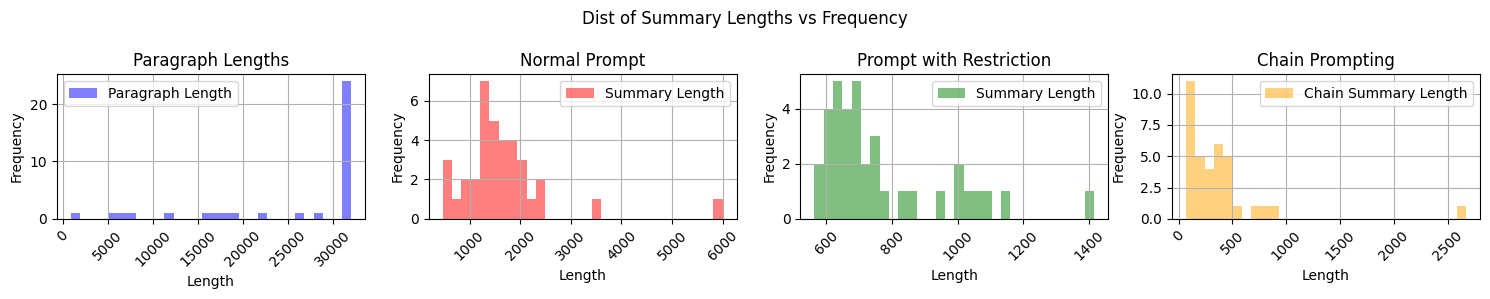

In [17]:
# Create a subplot with 1 row and 3 columns (adding the third plot)
plt.figure(figsize=(15, 3))

# Plot the distribution of paragraph lengths
plt.subplot(1, 4, 1)
plt.hist(df['paragraphs_len'], bins=30, color='blue', alpha=0.5, label='Paragraph Length')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.title('Paragraph Lengths')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Plot the distribution of summary lengths
plt.subplot(1, 4, 2)
plt.hist(df['summaries_normal_prompt_len'], bins=30, color='red', alpha=0.5, label='Summary Length')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.title('Normal Prompt')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Add your third plot here
plt.subplot(1, 4, 3)
plt.hist(df['summaries_normal_prompt_restrict_len'], bins=30, color='green', alpha=0.5, label='Summary Length')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.title('Prompt with Restriction')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

plt.subplot(1, 4, 4)
plt.hist(df['summaries_chain_prompt_len_len'], bins=30, color='orange', alpha=0.5, label='Chain Summary Length')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.title('Chain Prompting')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

plt.suptitle('Dist of Summary Lengths vs Frequency')
# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()

##### Metrics

 Original ROUGE paper states that “ROUGE-2 and ROUGE-L worked well in single document summarization tasks” while “ROUGE-1 and ROUGE-L perform great in evaluating short summaries”.

In [ ]:
rouge = Rouge()
scores = rouge.get_scores(df.loc[:,'paragraphs'], df.loc[:,'summaries_normal_prompt'])
# Extract precision (p), recall (r), and F1-score (f) values
precision_values = [score['rouge-1']['p'] for score in scores]
recall_values = [score['rouge-1']['r'] for score in scores]
f1_values = [score['rouge-1']['f'] for score in scores]

# Calculate the average
average_precision = np.mean(precision_values)
average_recall = np.mean(recall_values)
average_f1 = np.mean(f1_values)

print(f"Average Precision (p): {average_precision}")
print(f"Average Recall (r): {average_recall}")
print(f"Average F1-Score (f): {average_f1}")

Average Precision (p): 0.0944890418923734
Average Recall (r): 0.7880433277160663
Average F1-Score (f): 0.15980012196193996


In [ ]:
rouge = Rouge()
scores = rouge.get_scores(df.loc[:,'paragraphs'], df.loc[:,'summaries_normal_prompt_restrict'])
# Extract precision (p), recall (r), and F1-score (f) values
precision_values = [score['rouge-1']['p'] for score in scores]
recall_values = [score['rouge-1']['r'] for score in scores]
f1_values = [score['rouge-1']['f'] for score in scores]

# Calculate the average
average_precision = np.mean(precision_values)
average_recall = np.mean(recall_values)
average_f1 = np.mean(f1_values)

print(f"Average Precision (p): {average_precision}")
print(f"Average Recall (r): {average_recall}")
print(f"Average F1-Score (f): {average_f1}")

Average Precision (p): 0.061087053334384925
Average Recall (r): 0.831125567963639
Average F1-Score (f): 0.1042111538514207


In [ ]:
rouge = Rouge()
scores = rouge.get_scores(df.loc[:,'paragraphs'], df.loc[:,'summaries_chain_prompt_1'])
# Extract precision (p), recall (r), and F1-score (f) values
precision_values = [score['rouge-1']['p'] for score in scores]
recall_values = [score['rouge-1']['r'] for score in scores]
f1_values = [score['rouge-1']['f'] for score in scores]

# Calculate the average
average_precision = np.mean(precision_values)
average_recall = np.mean(recall_values)
average_f1 = np.mean(f1_values)

print(f"Average Precision (p): {average_precision}")
print(f"Average Recall (r): {average_recall}")
print(f"Average F1-Score (f): {average_f1}")

Average Precision (p): 0.08691724828944315
Average Recall (r): 0.7195104230178766
Average F1-Score (f): 0.14394129479242948


This tells that chain prompting is able to do better in machine evaluation.